可视化region划分

In [1]:
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
geo = pd.read_csv('../../../traj_gen_exp_porto/data/Porto_Taxi/cleaned-data/roadmap.cleaned.geo')
real = pd.read_csv('../../../traj_gen_exp_porto/data/Porto_Taxi/cleaned-data/traj_tes_10000_random.cleaned.csv')
gene = pd.read_csv('../gene/new_gene_one_softmax/new_gene_one_softmax_seed0_2024-04-13_10-08-34.csv')

with open('../../../traj_gen_exp_porto/data/Porto_Taxi/ts_trajgen-output/partition/small_region2rid.pkl', 'rb') as file:
    small_region2rid = pickle.load(file)
with open('../../../traj_gen_exp_porto/data/Porto_Taxi/ts_trajgen-output/partition/rid2small_region.pkl', 'rb') as file:
    rid2small_region = pickle.load(file)
with open('../../../traj_gen_exp_porto/data/Porto_Taxi/ts_trajgen-output/partition/big_region2rid.pkl', 'rb') as file:
    big_region2rid = pickle.load(file)
with open('../../../traj_gen_exp_porto/data/Porto_Taxi/ts_trajgen-output/partition/rid2big_region.pkl', 'rb') as file:
    rid2big_region = pickle.load(file)

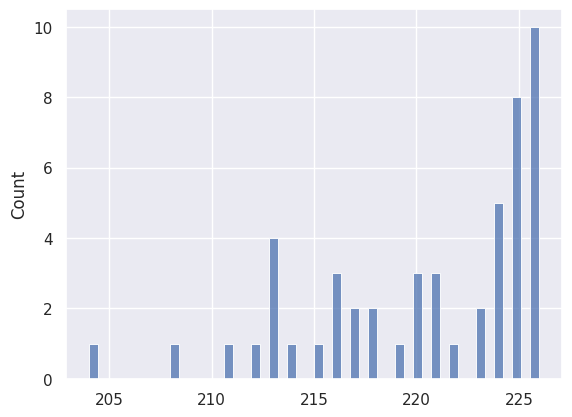

In [3]:
big_region_size_list = [len(v) for v in big_region2rid.values()]
big_region_size_list = np.array(big_region_size_list)
sns.histplot(big_region_size_list, bins=50)

plt.show()

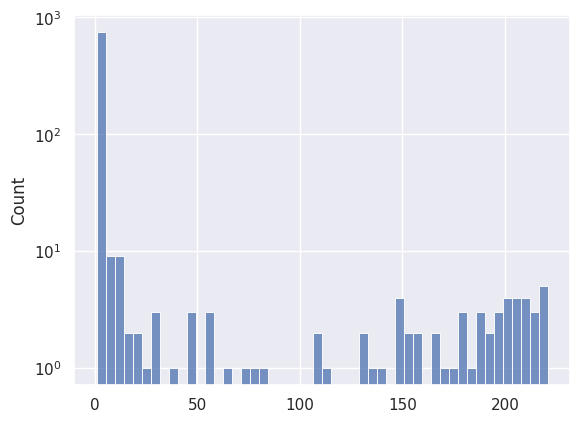

In [4]:
small_region_size_list = [len(v) for v in small_region2rid.values()]
small_region_size_list = np.array(small_region_size_list)
sns.histplot(small_region_size_list, bins=50)

plt.yscale('log')
plt.show()

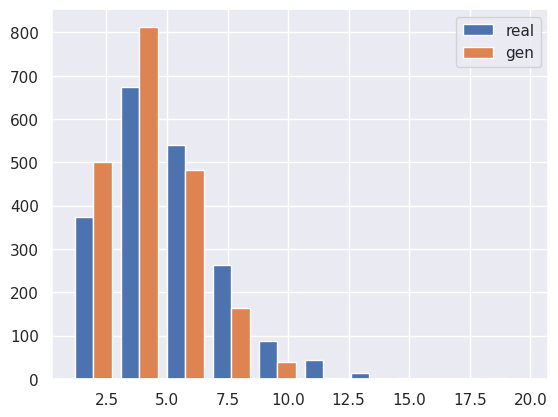

In [5]:
real_big_region_len = []
for _, row in real.iterrows():
    rid_list = list(eval(row['rid_list']))
    region_list = [rid2big_region[rid_list[0]]]

    for rid in rid_list[1:]:
        cur_region = rid2big_region[rid]
        if cur_region != region_list[-1]:
            region_list.append(cur_region)

    real_big_region_len.append(len(region_list))

gene_big_region_len = []
for _, row in gene.iterrows():
    rid_list = list(eval(row['rid_list']))
    region_list = [rid2big_region[rid_list[0]]]

    for rid in rid_list[1:]:
        cur_region = rid2big_region[rid]
        if cur_region != region_list[-1]:
            region_list.append(cur_region)

    gene_big_region_len.append(len(region_list))

real_big_region_len = np.array(real_big_region_len)
gene_big_region_len = np.array(gene_big_region_len)

plt.hist([real_big_region_len, gene_big_region_len], label=['real', 'gen'])

plt.legend()
plt.show()

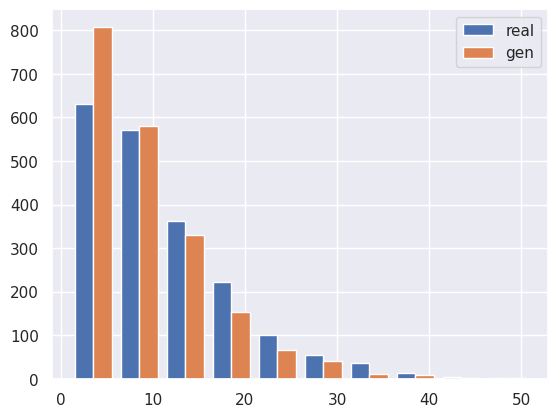

In [6]:
real_small_region_len = []
for _, row in real.iterrows():
    rid_list = list(eval(row['rid_list']))
    region_list = [rid2small_region[rid_list[0]]]

    for rid in rid_list[1:]:
        cur_region = rid2small_region[rid]
        if cur_region != region_list[-1]:
            region_list.append(cur_region)

    real_small_region_len.append(len(region_list))

gene_small_region_len = []
for _, row in gene.iterrows():
    rid_list = list(eval(row['rid_list']))
    region_list = [rid2small_region[rid_list[0]]]

    for rid in rid_list[1:]:
        cur_region = rid2small_region[rid]
        if cur_region != region_list[-1]:
            region_list.append(cur_region)

    gene_small_region_len.append(len(region_list))

real_small_region_len = np.array(real_small_region_len)
gene_small_region_len = np.array(gene_small_region_len)

plt.hist([real_small_region_len, gene_small_region_len], label=['real', 'gen'])

plt.legend()
plt.show()

In [7]:
# 可视化big region的划分
vis_data1 = []
for big_region, rid_list in big_region2rid.items():
    region_coordinates = []
    for rid in rid_list:
        coordinates = eval(geo.loc[rid, 'coordinates'])
        for i in range(len(coordinates)):
            coordinates[i] = coordinates[i][::-1]
        region_coordinates.append(coordinates)
    vis_data1.append(region_coordinates)

# 可视化small region的划分
vis_data2 = []
for small_region, rid_list in small_region2rid.items():
    region_coordinates = []
    for rid in rid_list:
        coordinates = eval(geo.loc[rid, 'coordinates'])
        for i in range(len(coordinates)):
            coordinates[i] = coordinates[i][::-1]
        region_coordinates.append(coordinates)
    vis_data2.append(region_coordinates)

with open('./vis2_1.json', 'w') as file:
    json.dump(vis_data1, file)

with open('./vis2_2.json', 'w') as file:
    json.dump(vis_data2, file)